<a href="https://colab.research.google.com/github/dastone16/pack-density/blob/main/pack_density_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

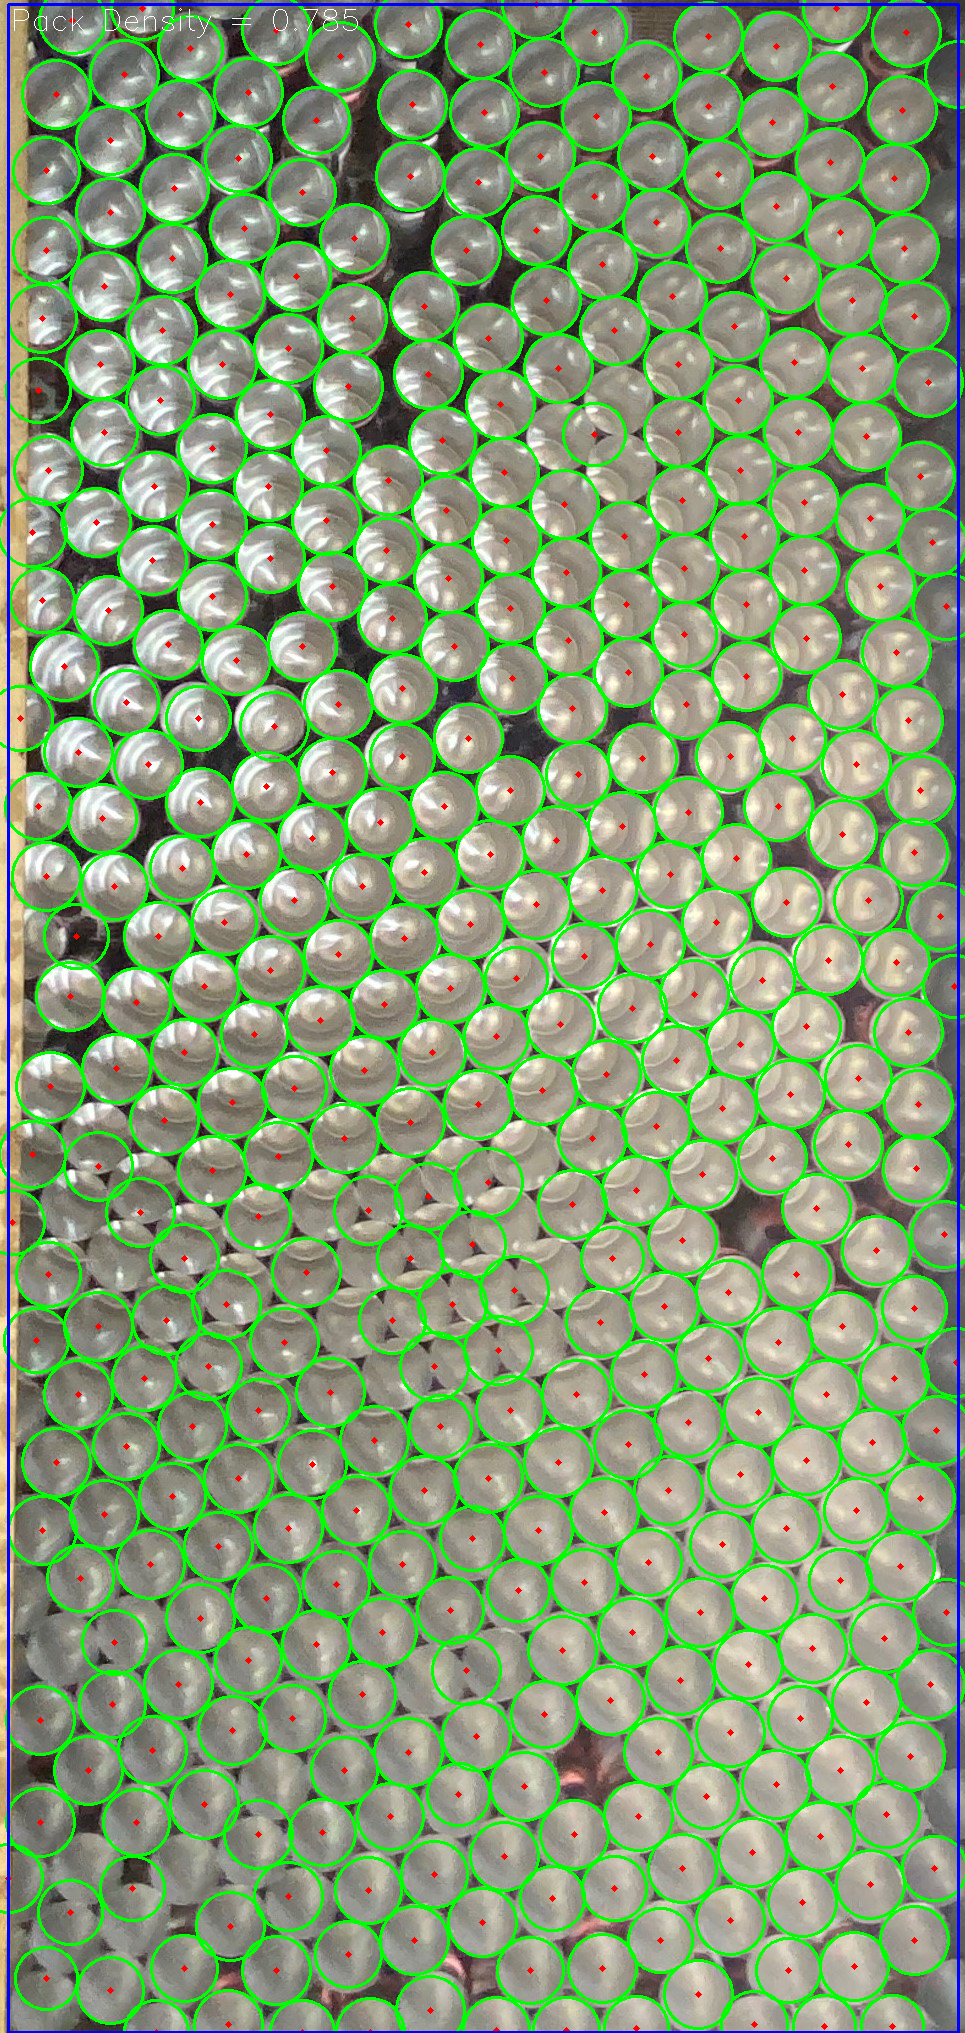

True

In [37]:
from numpy.lib.nanfunctions import nanprod
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time

timestr = time.strftime("%Y%m%d-%H%M")
min_h=np.double(np.inf)
min_w=np.double(np.inf)
max_h=np.double(-np.inf)
max_w=float(-np.inf)

total_circle_area = float(0)
rec_area = float(0)
r_a = 0 #radius adjustment to make cicles slightly bigger, units=pixels
#CAREFUL - r_a can significantly influence pack density

# Read image.
img = cv2.imread('/content/OLVB.L5.IBO.b.z3.jpg', cv2.IMREAD_COLOR)

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1,60, param1 = 50,
			param2 = 8, minRadius = 30, maxRadius = 35) 

#Best improvement is by changing minDist to higher number then adjust param1 and 2.
#minDist (second param after Hough_Gradient) 
#param2 - lower number increases number of circules detected.

# Draw circles that are detected.
if detected_circles is not None:

	# Convert the circle parameters a, b and r to integers.
	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]
		
		# Draw the circumference of the circle.
		cv2.circle(img, (a, b), r+r_a, (0, 255, 0), 2)
		if b > max_h:
			max_h = b 
		if b < min_h:
			min_h = b
		if a > max_w:
			max_w = a
		if a < min_w:
			min_w = a
		
		total_circle_area += float(np.pi*(r+r_a)**2)
		# Draw a small circle (of radius 1) to show the center.
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

		#cv2.waitKey(0)
	

	cv2.rectangle(img,(max_w,max_h),(min_w,min_h),(255,0,0),2)
	
width=np.double(max_w-min_w)
height=np.double(max_h-min_h)
rec_area= width*height
pack_density = float(total_circle_area/rec_area)
cv2.putText(img,"Pack Density = "+ str(np.around(pack_density,decimals=3)),(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1,2)
cv2_imshow(img)
cv2.imwrite("/content/OLVB.oven.mat." + timestr +".out.jpg", img)

In [35]:
print(pack_density)

0.7845225092632309


In [36]:
#can_p = 
avgs = np.average(detected_circles,axis=1)
diam = avgs[0,2]

can_radius=1.13 # 12 sl height

mat_width = height/(diam+r_a)*can_radius/12  #height of rectangle/average circle pixels*can radius/12

f = open('summary.'+timestr+'.txt','w+',errors='replace')
f.write("The can radius was input as "+str(round(can_radius,3))+" inches. \n")
f.write("Estimated pack density is "+ str(round(pack_density,3))+" \n")
f.write("The mat width is estimated to be " + str(round(mat_width,3)) + " feet \n")
f.close()

print("The can radius was input as "+str(round(can_radius,3))+" inches. \n")
print("Estimated pack density is "+ str(round(pack_density,3))+" \n")
print("The mat width is estimated to be " + str(round(mat_width,3)) + " feet \n")



The can radius was input as 1.13 inches. 

Estimated pack density is 0.785 

The mat width is estimated to be 5.691 feet 

